# AlexNet
它首次证明了学习到的特征可以超越手工设计的特征，从而一举打破计算机视觉研究的前状。

## 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 超参

In [2]:
EPOCHS = 50
BATCH_SIZE = 256
LR = 0.1
VERBOSE = 1
IMAGE_SIZE = 224

## 导入数据集

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = tf.reshape(train_images, (train_images.shape[0], train_images.shape[1], train_images.shape[2], -1))
test_images = tf.reshape(test_images, (test_images.shape[0], test_images.shape[1], test_images.shape[2], -1))

In [6]:
train_images = tf.image.resize_with_pad(train_images, IMAGE_SIZE, IMAGE_SIZE)
test_images = tf.image.resize_with_pad(test_images, IMAGE_SIZE, IMAGE_SIZE)

In [7]:
train_images.shape

TensorShape([10000, 224, 224, 1])

## 定义模型

In [9]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=11, strides=4, activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 1)),
    keras.layers.MaxPool2D(pool_size=3, strides=2),
    
    keras.layers.Conv2D(filters=256, kernel_size=5, padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=3, strides=2),
    
    keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=384, kernel_size=3, padding='same', activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=3, strides=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='sigmoid')
])

## 设置优化器和损失函数

In [10]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 开始训练

In [11]:
history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE)

Train on 10000 samples
Epoch 1/50
10000/10000 [==============================] - 13s 1ms/sample - loss: 2.3355 - accuracy: 0.1000
Epoch 2/50
10000/10000 [==============================] - 9s 852us/sample - loss: 2.2443 - accuracy: 0.1216
Epoch 3/50
10000/10000 [==============================] - 9s 856us/sample - loss: 1.9946 - accuracy: 0.1687
Epoch 4/50
10000/10000 [==============================] - 9s 865us/sample - loss: 1.4947 - accuracy: 0.3838
Epoch 5/50
10000/10000 [==============================] - 9s 872us/sample - loss: 1.1641 - accuracy: 0.5316
Epoch 6/50
10000/10000 [==============================] - 9s 860us/sample - loss: 1.3099 - accuracy: 0.5528
Epoch 7/50
10000/10000 [==============================] - 9s 856us/sample - loss: 1.3358 - accuracy: 0.5728
Epoch 8/50
10000/10000 [==============================] - 9s 855us/sample - loss: 1.1184 - accuracy: 0.6127
Epoch 9/50
10000/10000 [==============================] - 9s 855us/sample - loss: 0.7815 - accuracy: 0.7125
Epoch 

## 绘制梯度下降图

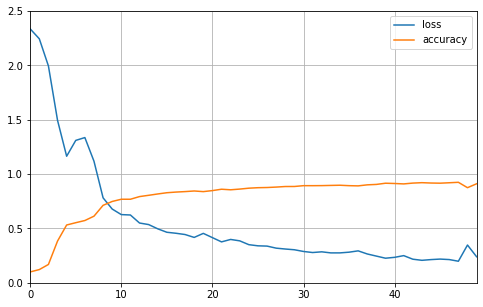

In [16]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2.5)
    plt.show()
    
plot_learning_curves(history)

## 测试训练好的模型

In [13]:
model.evaluate(test_images, test_labels)

3000/3000 [==============================] - 2s 624us/sample - loss: 0.5338 - accuracy: 0.8190


[0.5337661986351013, 0.819]

## 保存模型 

In [14]:
model.save('./save/save_model/model.h5')

In [15]:
model.save_weights('./save/save_weights/model_weights.h5')